In [87]:
#pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.grid_search import GridSearchCV

In [88]:
#loading dataset
db = pd.read_csv('dataset.csv')

In [89]:
# Numerize diagnosis "M" malignant; "B" benign using a dictionary and map function
diagnosis_coding = {'M':1, 'B':0}
db.diagnosis = db.diagnosis.map(diagnosis_coding)
# Drop unecessary columns
db.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

In [90]:
# Reorder columns so diagnosis is at right-most
# Now define a diagnosis series object
diagnosis = db.diagnosis
# Then drop diagnosis from dataframe
db.drop('diagnosis', axis = 1, inplace = True)
# Then append diagnosis to end of dataframe
db['Diagnosis'] = diagnosis

In [91]:
# A quick glimpse of the dataset
db.head()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,Fractal_dimension_mean,...,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [92]:
# Quick glimpse of tumor features (mean values) With respect to the diagnosis
db.groupby('Diagnosis').mean()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [93]:
# For visual comparisons of different diagnosis
# create two dataframes : - one for benign, and other for malignant tumor data

db_x = db[db['Diagnosis'] == 0]
db_y = db[db['Diagnosis'] == 1]

# Create list of features related to mean tumor characteristics
features_mean_list =list(db.columns[0:10])

In [94]:
# percentage classifiaction of the data set (Benign and Malignant)
data_count = db.Diagnosis.value_counts()
data_count = pd.Series(data_count)
data_count = pd.DataFrame(data_count)
data_count.index = ['Benign', 'Malignant']

data_count['Percent'] = 100*data_count['Diagnosis']/sum(data_count['Diagnosis'])
data_count['Percent'] = data_count['Percent'].round().astype('int')
data_count

,Diagnosis,Percent
Benign,357,63
Malignant,212,37


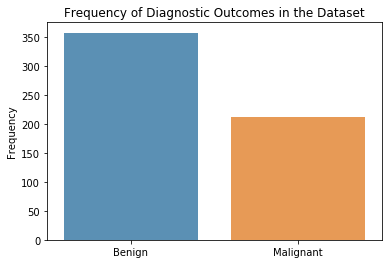

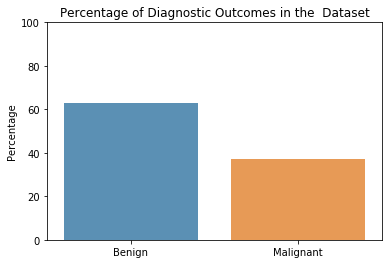

In [95]:
# Visualize frequency and percentage of Diagnostic Outcomes in the  Dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'Diagnosis', data = data_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in the Dataset')
plt.ylabel('Frequency')
plt.show()
sns.barplot(x = ['Benign', 'Malignant'], y = 'Percent', data = data_count, alpha = .8)
plt.title('Percentage of Diagnostic Outcomes in the  Dataset')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

In [96]:
# Split the dataset into  two sets: training and testing (Take  80% of the data  for training set)
x_train, x_test, y_train, y_test = train_test_split(db.iloc[:,:-1], db['Diagnosis'], train_size = .8 )

In [97]:
#  Feature scaling by normalization

# Instantiate 
norm = Normalizer()

# Fit
norm.fit(x_train)

# Transform both training and testing data sets
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

In [98]:
# Using Logistic Regression Model

# Define parameters for optimization of Logistic Regression  using dictionaries
LR_para = {'C':[0.001, 0.1, 1, 10, 100]}

In [110]:
LR_opt=[]
LR_opt.append((LogisticRegression(), LR_para))

In [117]:
#function to check the accuracy for Logistic Regression Model

def check(parameter_dictionary, scoring = 'accuracy'):
    
    
    for model, para in LR_opt:
    
        kfold = KFold(len(x_train_norm), n_folds=5, random_state=2, shuffle=True)

        model_grid = GridSearchCV(model, para)

        cv_result = cross_val_score(model_grid, x_train_norm, y_train, cv = kfold, scoring=scoring)

        ans = "Cross Validation Accuracy For LR :- Accuracy: %f SD: %f" % (cv_result.mean(), cv_result.std())

        print(ans)
        return(cv_result)

In [119]:
result= check (LR_opt,scoring='accuracy')

Cross Validation Accuracy For LR :- Accuracy: 0.903297 SD: 0.025441


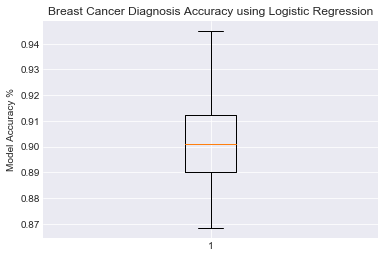

In [139]:
# Visualize Logistic regression accuracy

plt.boxplot(result)
plt.title('Breast Cancer Diagnosis Accuracy using Logistic Regression')
plt.ylabel('Model Accuracy %')
sns.set_style("darkgrid")
plt.show()